In [ ]:
## Todo: rewrite kernel so that it works for higher order tensors

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import torch

In [137]:
# numpy version

# class DataGenerator():
#     """Takes a specific dimensions and a kernel argument and returns a dataset 
#     generated using the Kernel
    
#     Parameters:
#     -----------
    
#     xdim : int
    
#         Dimesion of each x value
        
#     ydim : int
    
#         Dimesion of each y value
        
#     range_x : tuple
    
#         min, max values of range on which to define the data
    
#     num_instances : int 
    
#         Number data instances to generate
    
        
#     steps: tuple
        
#         number of x values to create 
    
#     """
    
#     def __init__(self, xdim=1,ydim=1,num_instances=10, range_x=(-2,2),steps=500):
#         self._xdim = xdim
#         self._ydim = ydim
#         self._num_instances = num_instances
#         self._xmin = range_x[0]
#         self._xmax = range_x[1]
#         self._steps = steps
        
#     def _create_x(self):
#         x_data = np.linspace(self._xmin,self._xmax,self._steps)
#         x_data = np.expand_dims(x_data,-1)
#         x_data = np.tile(x_data,(1,self._xdim))
#         return x_data
    
    
#     def _rbf_kernel(self,length_scale,gamma):
#         x = self._create_x()
#         y = x    
#         #getting x1^2+x2^2....xp^2 for each observation
#         xrow = np.sum(x*x,1)
#         yrow = np.sum(y*y,1)
#         #reshaping x and y sums so that we can add each y^2 row sum to each element of the vector xrow
#         #thus creating a matrix of pairwise sums x^2+y^2
#         x_res = np.reshape(xrow,(x.shape[0],1))
#         y_res = np.reshape(yrow,(1,x.shape[0]))
#         #this creats the xy product 
#         xy = np.dot(x, y.T)
#         # adding everything together of the form x^2+y^2-2xy scaling it 
#         kernel = np.exp(-gamma*((x_res + y_res - 2*xy)/length_scale),dtype=np.float32)
#         return x, kernel
        
#     def generate_curves(self, noise=1e-7,length_scale=0.4,gamma=1):
#         x_values, kernel = self._rbf_kernel(length_scale, gamma)
#         kernel = kernel+np.eye(self._steps)*noise
#         print(kernel)
#         cholesky_decomp = np.linalg.cholesky(kernel)
#         data = []
#         for i in range(self._num_instances):
#             #creating as many standard
#             standard_normals = np.random.normal(0,1,(self._steps,self._xdim))
#             func_x = cholesky_decomp@standard_normals
#             data.append(func_x)
#         return x_values, data
        


In [153]:
class DataGenerator():
    """Takes a specific dimensions and a kernel argument and returns a dataset 
    generated using the Kernel
    
    Parameters:
    -----------
    
    xdim : int
    
        Dimesion of each x value
        
    ydim : int
    
        Dimesion of each y value
        
    range_x : tuple
    
        min, max values of range on which to define the data
    
    num_instances : int 
    
        Number data instances to generate
    
        
    steps: tuple
        
        number of x values to create 
    
    """
    
    def __init__(self, xdim=1,ydim=1,num_instances=10, range_x=(-2,2),steps=500):
        self._xdim = xdim
        self._ydim = ydim
        self._num_instances = num_instances
        self._xmin = range_x[0]
        self._xmax = range_x[1]
        self._steps = steps
        
    def _create_x(self):
        x_data = torch.linspace(self._xmin,self._xmax,self._steps)
        x_data = x_data.unsqueeze(-1)
        x_data = x_data.repeat(1,self._xdim)
        return x_data
    
    
    def _rbf_kernel(self,length_scale,gamma):
        x = self._create_x()
        y = x    
        #getting x1^2+x2^2....xp^2 for each observation
        xrow = torch.sum(x*x,1)
        yrow = torch.sum(y*y,1)
        #reshaping x and y sums so that we can add each y^2 row sum to each element of the vector xrow
        #thus creating a matrix of pairwise sums x^2+y^2
        x_res = xrow.reshape(x.shape[0],1)
        y_res = yrow.reshape(1,x.shape[0])
        #this creats the xy product 
        xy = torch.mm(x,y.t())
        # adding everything together of the form x^2+y^2-2xy scaling it 
        kernel = torch.exp(-gamma*((x_res + y_res - 2*xy)/length_scale))
        return x, kernel
        
    def generate_curves(self, noise=1e-4,length_scale=0.4,gamma=1):
        x_values, kernel = self._rbf_kernel(length_scale, gamma)
        kernel = kernel+torch.eye(self._steps)*noise
        cholesky_decomp = torch.cholesky(kernel)
#         cholesky_decomp = torch.from_numpy(np.linalg.cholesky(kernel.numpy()))
        data = []
        for i in range(self._num_instances):
            #creating as many standard
            standard_normals = torch.normal(0,1,(self._steps,self._xdim))
            func_x = cholesky_decomp@standard_normals
            data.append(func_x)
        return x_values, data
        


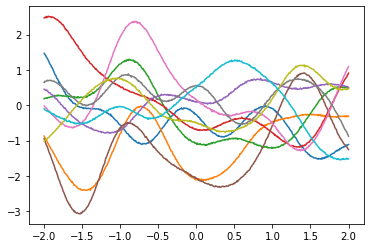

In [164]:
if __name__ == '__main__':
    gen = DataGenerator()
    x_values, data = gen.generate_curves()
    for i in range (gen._num_instances):
        plt.plot(x_values.flatten(), data[i].flatten())